## Introduction

This notebook is intended to give an introduction to the world of computer algebra: what it is, how we do it, and why we do it.

The notebook can also be thought of as an introduction to the python library: **SymPy**. This is an open source library that allows you to do symbolic computation through Python and is an astonishing library with a lot of functionality. 

## What is Computer Algebra?

When we first learn mathematics, one of the first things we learn to do is add. When faced with the question "What is $2+2$?" we know that the answer is $4$. Later we learn that calculators can easily do this kind of computation for us, and so can computers. In Python it is very easy to find out the answer:

In [1]:
print('2+2='+str(2+2))

2+2=4


Later we start to replace unknown numbers with letters, and started a foray into *algebra*. 

Things started pretty simple, solving equations such as $x-2=2$. We learn to add 2 to each side, and obviously we can use a computer to help with this sort of thing. 

But what about something a little bit more complicated? One of the first truly interesting operations we find out about is the square root. What if we need to solve an equation like $x^2=2$?

Let's appeal to the computer to help us. We know to take the square root of each side - Python's `math` library contains a square root function that we can use. We get the following answer:

In [2]:
from math import sqrt
sqrt(2)

1.4142135623730951

Now this answer is certainly a representation of the square root of two. But what happens if we square the answer to check?

In [3]:
sq_2 = sqrt(2)
sq_2*sq_2

2.0000000000000004

*What?* We started with the number 2, took it's square root, then squared that. We should obviously get 2 back again? Yet we have got a number ever so slightly bigger than 2. 

Why did we get this slightly wrong answer? Computers don't compute *exactly*: so by rounding the answer to 16 decimal places gives us a little error. There are ways to mitigate these errors: computing error bounds to ensure you are computing exactly to a certain precision. But there is also an alternative: **Computer Algebra!**.

As mentioned in the introduction, we will be using **SymPy**: so we import the library and initiate it.

In [4]:
from sympy import *
init_printing()

Now we do the same computation as earlier. Let us take the square root of 2.

In [5]:
sqrt(2)

Note that we didn't get a number approximating the square root of two, but we got a symbol representing the number. This may seem like cheating - we just wrote down the operator rather than actually computing anything! But we can use this representation in further computations and actually work with it just like a real number. So let us save it in a variable and try squaring it.

In [6]:
sq_2 = sqrt(2)
sq_2*sq_2

Notice that we got the integer 2 back! We didn't get an approximation of 2, or even the float 2: SymPy is smart enough to do the exact computation. And we can do more complicated calculations: $((\sqrt{2}+\sqrt{2})^3 + \sqrt{2})^2$. If we use **SymPy** we get the exact answer 578, whilst using the old value given to use by the `math` library gives us a number slightly smaller than 578.

In [7]:
((sq_2+sq_2)**3 + sq_2)**2

In [8]:
old_sq_2 = 1.41421356237
((old_sq_2+old_sq_2)**3 + old_sq_2)**2

So why don't computers always use a symbolic approach?

First, often we don't want a symbolic answer! Most of the time when we use a computer to do calculations we are looking to do something "in the real world" with the answer. If we have a numerical value that will be more useful than a string of symbols. 

That's not to say that you can't 'use' answers from **SymPy**. In fact, we can evaluate answers to any number of significant figures:

In [9]:
print(sq_2.evalf(100))
print('=========>')
print(sq_2.evalf(2000))

1.414213562373095048801688724209698078569671875376948073176679737990732478462107038850387534327641573
=========>
1.414213562373095048801688724209698078569671875376948073176679737990732478462107038850387534327641572735013846230912297024924836055850737212644121497099935831413222665927505592755799950501152782060571470109559971605970274534596862014728517418640889198609552329230484308714321450839762603627995251407989687253396546331808829640620615258352395054745750287759961729835575220337531857011354374603408498847160386899970699004815030544027790316454247823068492936918621580578463111596668713013015618568987237235288509264861249497715421833420428568606014682472077143585487415565706967765372022648544701585880162075847492265722600208558446652145839889394437092659180031138824646815708263010059485870400318648034219489727829064104507263688131373985525611732204024509122770022694112757362728049573810896750401836986836845072579936472906076299694138047565482372899718032680247442062926912485905218100

Another reason that computers generally don't do symbolic computation is that it's **hard**. I mean, **really, really hard**. It's not uncommon for a symbolic approach to have exponential complexity (even, like the algorithm I studied for my PhD thesis, double exponential complexity) when the numerical approach may be quadratic, or simpler complexity.

Not only is it hard, but most of the time it's not worth the effort. If you consider the computation $((\sqrt{2}+\sqrt{2})^3 + \sqrt{2})^2$ we see that the numeric and symbolic computations are (after rounding the numeric solution) the same until the 9th decimal place. Double the precision of the numeric solution for the squareroot of 2 and you get a much more accurate solution with very little extra effort.

So why do it at all? Because there are applications where we need an exact solution, and no numerical approach will do. There are also applications when a symbolic and numeric approach can be combined to give extreme accuracy (not quite exact but arbitrarily close) but with efficient complexity.

In particular, symbolic computation can be used by mathematicians to help with their work. Much as an shopkeeper uses a calculator to help sum up the sales at the end of the day, a mathematician can use symbolic computation to solve equations for them. Not only is this faster than using brain power but you elimiate a large degree of human error.

## What can Computer Algebra do?

So far, we have only seen the simplest of examples of what computer algebra can do. We manually solved the equation $x^2=2$ and just used the computer for computation.

Now let's just get **SymPy** to solve it directly.

In [12]:
x = symbols('x')
solve(x**2-2,x)

Notice that **SymPy** gives us the answer directly. Not only does it give us a solution, but it gives us *all* solutions. So let's get a little more complicated...

In [13]:
solve(x**3-3*x**2+x-3,x)

Cubics are pretty simple for **SymPy** (remember that cubics, and quartics, have an exact algorithm to solve them). Notice that we also get complex solutions, not just real solutions. This is not something a computer would generally be able to give us.

But what happens if we have other variables?

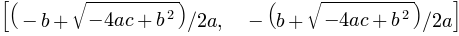

In [15]:
a,b,c = symbols('a b c')
solve(a*x**2+b*x+c, x)

We can solve parametrized equations too, and in the above case we get the quadratic formula as the solution. 